# ***U.S Census At School - Analyzing the Data***
---

*José Carrera - 2215335*

*Martín García - 2230436*

*David Melo - 2230232*

*Juan Andrés Ruiz - 2230557*

## ***Preparación y Exploración de Datos***

### **Importando las librerías**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats


plt.style.use('ggplot')

### **Leyendo el dataframe y mostrando las primeras filas**

In [2]:
df = pd.read_csv("../data/merged_data.csv")

In [3]:
df.head(10)

,Region,Gender,Handed,Favourite_physical_activity,Importance_reducing_pollution,Birth_month,Beverage,Favorite_School_Subject,Sleep_Hours_Non_Schoolnight,Paid_Work_Hours,Work_At_Home_Hours,Planned_Education_Level
0,CA,Male,Right-Handed,Running/Jogging,1000,April,Water,Computers and technology,11,0,10,Undergraduate degree
1,CA,Male,Right-Handed,Walking/Hiking,1000,May,Water,Science,12,0,7,Graduate degree
2,CA,Male,Right-Handed,Soccer,1000,June,Water,Mathematics and statistics,10,0,6,Some college
3,CA,Male,Right-Handed,Swimming,1000,June,Water,Physical education,8,0,7,Other
4,CA,Male,Right-Handed,Basketball,900,July,Water,English,9,0,4,Graduate degree
5,CA,Male,Right-Handed,Swimming,0,August,Water,Mathematics and statistics,8,0,3,Graduate degree
6,CA,Female,Right-Handed,Martial Arts,989,August,Water,Art,9,0,3,Graduate degree
7,CA,Female,Right-Handed,Tennis,650,June,Water,History,11,17,7,Graduate degree
8,CA,Male,Right-Handed,Athletics,1000,December,Water,Art,8,0,2,Some college
9,CA,Male,Right-Handed,Soccer,91,September,Water,History,7,14,10,Graduate degree


### **Mostrando sus dimensiones**

In [4]:
filas = df.shape[0]
columnas = df.shape[1]

print(f"El dataset tiene {filas} filas y {columnas} columnas.")

El dataset tiene 1443 filas y 12 columnas.


### **Tipos de variables**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1443 entries, 0 to 1442
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Region                         1443 non-null   object
 1   Gender                         1443 non-null   object
 2   Handed                         1443 non-null   object
 3   Favourite_physical_activity    1443 non-null   object
 4   Importance_reducing_pollution  1443 non-null   int64 
 5   Birth_month                    1443 non-null   object
 6   Beverage                       1443 non-null   object
 7   Favorite_School_Subject        1443 non-null   object
 8   Sleep_Hours_Non_Schoolnight    1443 non-null   int64 
 9   Paid_Work_Hours                1443 non-null   int64 
 10  Work_At_Home_Hours             1443 non-null   int64 
 11  Planned_Education_Level        1443 non-null   object
dtypes: int64(4), object(8)
memory usage: 135.4+ KB


In [6]:
df["Sleep_Hours_Non_Schoolnight"].value_counts()

Sleep_Hours_Non_Schoolnight
10    345
9     318
8     282
7     107
12     98
11     81
6      76
5      53
4      34
3      19
13     10
14      6
15      5
2       5
1       4
Name: count, dtype: int64

### **Sobre el dataset**

#### ***a) Unidad de estudio***
La unidad de estudio en este caso corresponde a cada estudiante individual que respondió al cuestionario "*Census at School*". Cada fila del dataset representa un estudiante con sus respectivas características.

#### ***b) Población objeto de estudio***
La población objeto de estudio son los estudiantes de los Estados Unidos que participaron en el cuestionario "*Census at School*". Esta población incluye a estudiantes de diversas edades, géneros, y características socioeconómicas, aunque en este análisis se centró en un subconjunto específico de estudiantes (de 500 por cada estado seleccionado).

#### ***c) Muestra de estudio***
La muestra de estudio es un subconjunto de estudiantes que se seleccionó de la población original. Este archivo tiene 12 columnas, puesto que se han reducido las variables de interés para podernos concentrar en aspectos específicos para el análisis. 

#### ***d) Variable de análisis***
Las variables de análisis son las columnas del dataset que iremos a analizar a continuación. Cada columna en el archivo CSV representa una variable distinta que se analizará. Estas variables pueden incluir edad, género, tiempos de viaje a la escuela, altura, y otros atributos de los estudiantes según el cuestionario original.

#### ***e) Tipo de variables y su escala de medición***

##### **Tipo de Variables**

***Categóricas***: Variables que representan categorías o grupos, como "Género" (Male, Female), "Método de transporte" (Car, Bus, etc.).

***Numéricas***:
* **Discretas**: Contadores como  la cantidad de personas en el hogar.
* **Continuas**: Medidas como altura, tiempo de viaje, etc.

##### **Escala de Medición**

***Nominal***: Categorías sin un orden intrínseco (*por ejemplo, "**Género**"*).

***Ordinal***: Categorías con un orden lógico (*aunque no siempre numérico; por ejemplo, "**Nivel de educación planeado**"*).

***Intervalo***: Variables numéricas donde las diferencias son significativas, pero no hay un verdadero cero (*no aplicable en el dataset*).

***Razón***: Variables numéricas con un verdadero cero, como altura, tiempo, etc.

#### ***f) Variables clave para el análisis***

* ***Region*** (Estado): Útil para segmentar los resultados de los análisis geográficamente.

* ***Gender*** (*Género*): Es fundamental para realizar comparaciones entre hombres y mujeres en diversas actividades y preferencias.

* ***Favourite_physical_activity*** (*Actividad física favorita*): Permite identificar patrones en las preferencias deportivas y cómo estas se relacionan con otras variables como el género o la región.

* ***Importance_reducing_pollution*** (*Importancia de reducir la contaminación*): Es una variable ordinal que se puede analizar en relación con otras variables como la educación planificada o el género.

* **Sleep_Hours_Non_Schoolnight** (*Horas de sueño en noches sin clases*): Importante para analizar hábitos de sueño y cómo estos varían según otras características.

* ***Paid_Work_Hours*** (*Horas trabajadas con pago*): Se puede usar para entender cómo los estudiantes distribuyen su tiempo entre el trabajo y otras actividades.

* ***Planned_Education_Level*** (*Nivel de educación planificado*): Esta variable ofrece insights sobre las aspiraciones académicas y se puede cruzar con variables como el género o el mes de nacimiento.

## ***Análisis Descriptivo de los Datos***

### *1. ¿Cuántos estudiantes son diestros, zurdos o ambidiestros?*
Existen **1250** estudiantes que son *diestros*, **134** que son *zurdos* y **59** que manejan ambas manos (*ambidiestros*).

In [7]:
conteo_mano_dominante = df["Handed"].value_counts()

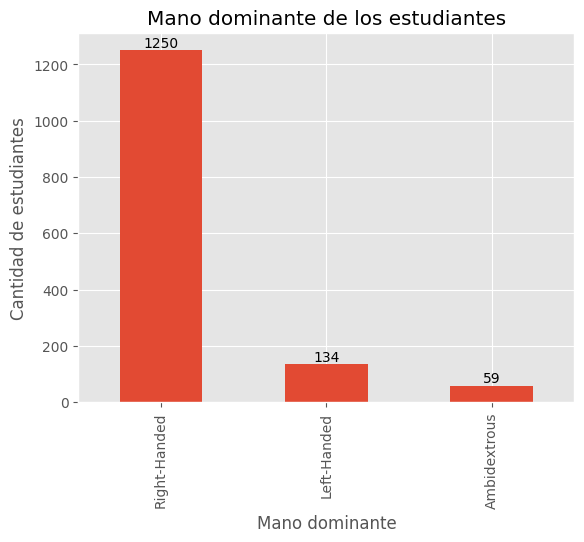

In [8]:
conteo_mano_dominante.plot(kind="bar")

for i, value in enumerate(conteo_mano_dominante):
    plt.text(i, value, str(value), ha = 'center', va = 'bottom')

plt.title("Mano dominante de los estudiantes")
plt.xlabel("Mano dominante")
plt.ylabel("Cantidad de estudiantes")

plt.show()

### *2. ¿Cuál es el mes donde nacieron más estudiantes de los que participan en el Censo escolar en cada estado?*

De los estudiantes que participan en el Censo escolar, se puede determinar que el mes donde más nacieron estudiantes en todos los estados fue **Septiembre**.

In [9]:
conteo_nacimientos_por_mes = (df.groupby(['Region', 'Birth_month']).size()
                            .reset_index(name='Count'))

mes_más_comun_por_estado = conteo_nacimientos_por_mes.groupby('Region').agg(
    Mes_Nacimiento=('Birth_month', lambda x: x.loc[x.idxmax()]),
    Conteo=('Count', 'max')
).reset_index()

mes_más_comun_por_estado

,Region,Mes_Nacimiento,Conteo
0,CA,September,38
1,FL,September,38
2,NY,September,41
3,TX,September,38


### *3. ¿Cuál es la bebida favorita de los estudiantes que participan en el Censo escolar en cada estado?*

De los estudiantes que participan en el Censo escolar, se puede determinar que la bebida favorita en todos los estados es **el agua**.

In [10]:
conteo_bebidas_favoritas = (df.groupby(["Region", "Beverage"]).size()
                                       .reset_index(name='Count'))

bebida_favorita_por_estado = conteo_bebidas_favoritas.groupby('Region').agg(
    Bebida_Favorita=('Beverage', lambda x: x.loc[x.idxmax()]),
    Conteo=('Count', 'max')
).reset_index()

bebida_favorita_por_estado

,Region,Bebida_Favorita,Conteo
0,CA,Water,280
1,FL,Water,255
2,NY,Water,260
3,TX,Water,235


### *4. ¿Cuál es el deporte / actividad favorita de los estudiantes que participan en el Censo escolar en cada estado?*

De los estudiantes que participan en el Censo escolar, se puede determinar que la actividad física favorita de todos ellos es **caminar o hacer senderismo**.

In [11]:
conteo_deporte_favorito = (df.groupby(["Region", "Favourite_physical_activity"]).size()
                                        .reset_index(name='Count'))

deporte_favorito_por_estado = conteo_deporte_favorito.groupby('Region').agg(
    Deporte_Favorito=('Favourite_physical_activity', lambda x: x.loc[x.idxmax()]),
    Conteo=('Count', 'max')
).reset_index()

deporte_favorito_por_estado

,Region,Deporte_Favorito,Conteo
0,CA,Walking/Hiking,49
1,FL,Walking/Hiking,60
2,NY,Walking/Hiking,48
3,TX,Walking/Hiking,54


### *5. ¿Cuál es el nivel más alto de educación que planean alcanzar los estudiantes que participan en el Censo escolar en cada estado?*

De los estudiantes que participan en el Censo escolar, se puede determinar que el nivel más alto de educación que planean alcanzar los estudiantes es **la licenciatura o Undergraduate degree**.

In [12]:
conteo_nivel_educacion_deseado = (df.groupby(["Region", "Planned_Education_Level"]).size()
                                        .reset_index(name='Count'))

nivel_educacion_deseado_por_estado = conteo_nivel_educacion_deseado.groupby('Region').agg(
    Nivel_Educacion_Deseado=('Planned_Education_Level', lambda x: x.loc[x.idxmax()]),
    Conteo=('Count', 'max')
).reset_index()

nivel_educacion_deseado_por_estado

,Region,Nivel_Educacion_Deseado,Conteo
0,CA,Undergraduate degree,257
1,FL,Undergraduate degree,270
2,NY,Undergraduate degree,265
3,TX,Undergraduate degree,215


### **6. Construya un histograma con la variable “tiempo que trabaja con pago el estudiante en la semana (medido en horas)” y a partir de esta gráfica responda las siguientes preguntas:**

#### *a. ¿Qué porcentaje de los estudiantes de la muestra trabajan máximo 13 horas a la semana con pago?*


Apróximadamente el 84.2% de los estudiantes trabajan máximo 13 horas a la semana con pago

In [13]:
min_paid, max_paid = df['Paid_Work_Hours'].min(), df['Paid_Work_Hours'].max()

total = len(df['Paid_Work_Hours'])
total, min_paid, max_paid

(1443, 0, 64)

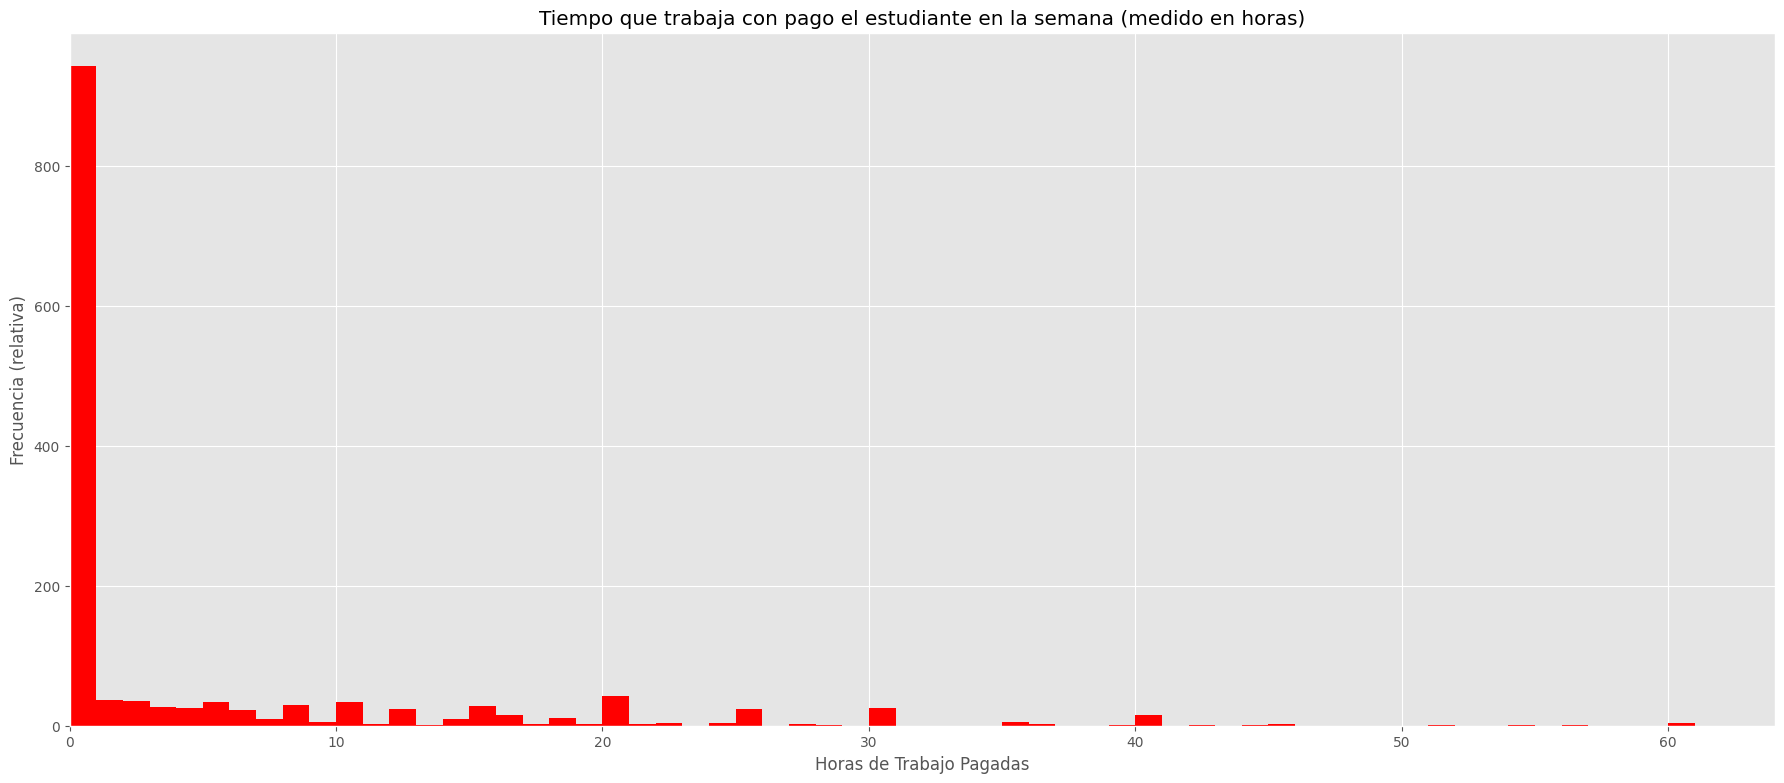

In [14]:
plt.figure(figsize=(22, 9))

# Crear el histograma con densidad y límites en el eje x
ax = df['Paid_Work_Hours'].plot.hist(bins=range(0, 64), xlim=(min_paid, max_paid), color='red')

# Superponer la curva de densidad
#df['Paid_Work_Hours'].plot.density(ax=ax, color='blue')

# Títulos y etiquetas
plt.title('Tiempo que trabaja con pago el estudiante en la semana (medido en horas)')
plt.xlabel('Horas de Trabajo Pagadas')
plt.ylabel('Frecuencia (relativa)')

plt.show()

Vemos que los valores apróximados de cada intervalo son:

(0, 1]	950	

(1, 2]	36	

(2, 3]	35	

(3, 4]	26	

(4, 5]	25

(5, 6]	30

(6, 7]	22

(7, 8]	10

(8, 9]	29

(9, 10]	5

(10, 11]	30

(11, 12]	5

(12, 13]	18

Teniendo en cuenta estos valores realizamos la suma de las anteriores frecuencias absolutas / suma total de las frecuencias absolutas:
(1215/1443)*100=84.20

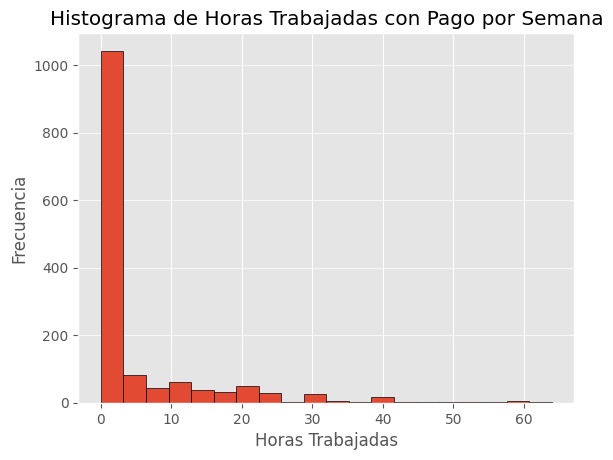

In [15]:
# Definir la columna de interés y le damos el nombre de columna_horas
columna_horas = 'Paid_Work_Hours'

# Crear el histograma
plt.hist(df[columna_horas], bins=20, edgecolor='black')
plt.title('Histograma de Horas Trabajadas con Pago por Semana')
plt.xlabel('Horas Trabajadas')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [16]:
porcentaje_max_13_horas = (df[df[columna_horas] <= 13].shape[0] / df.shape[0]) * 100
print(f"Porcentaje de estudiantes que trabajan máximo 13 horas: {porcentaje_max_13_horas:.2f}%")


Porcentaje de estudiantes que trabajan máximo 13 horas: 85.31%


In [17]:
porcentaje_min_3_horas = (df[df[columna_horas] >= 3].shape[0] / df.shape[0]) * 100
print(f"Porcentaje de estudiantes que trabajan mínimo 3 horas: {porcentaje_min_3_horas:.2f}%")


Porcentaje de estudiantes que trabajan mínimo 3 horas: 29.59%


In [18]:
horas_min_20_percentil = df[columna_horas].quantile(0.2)
print(f"El 20% de los estudiantes trabajan mínimo {horas_min_20_percentil:.2f} horas con pago.")


El 20% de los estudiantes trabajan mínimo 0.00 horas con pago.


In [19]:
horas_max_20_percentil = df[columna_horas].quantile(0.8)
print(f"El 20% de los estudiantes trabajan máximo {horas_max_20_percentil:.2f} horas con pago.")


El 20% de los estudiantes trabajan máximo 8.00 horas con pago.


In [20]:
moda = df[columna_horas].mode()[0]
print(f"La moda está en el intervalo que contiene: {moda} horas.")


La moda está en el intervalo que contiene: 0 horas.


In [21]:
horas_max_50_percentil = df[columna_horas].quantile(0.5)
print(f"El 50% de los estudiantes trabajan máximo {horas_max_50_percentil:.2f} horas con pago.")

El 50% de los estudiantes trabajan máximo 0.00 horas con pago.


In [22]:
promedio_horas = df[columna_horas].mean()
desviacion_estandar_horas = df[columna_horas].std()
print(f"En promedio, los estudiantes trabajan {promedio_horas:.2f} horas con pago a la semana.")
print(f"La desviación estándar es {desviacion_estandar_horas:.2f} horas.")


En promedio, los estudiantes trabajan 4.77 horas con pago a la semana.
La desviación estándar es 9.63 horas.


In [23]:
asimetria = df[columna_horas].skew()
if asimetria > 0:
    print("La variable tiene asimetría positiva.")
elif asimetria < 0:
    print("La variable tiene asimetría negativa.")
else:
    print("La variable es simétrica.")


La variable tiene asimetría positiva.


### *7. Construya una Ojiva para la variable “Tiempo que dedican los estudiantes para ayudar a los quehaceres del Hogar” y a partir de esta gráfica responda las siguientes preguntas:*

In [24]:
tiempo_hogar = df['Work_At_Home_Hours']

In [25]:
frecuencias = tiempo_hogar.value_counts().sort_index()
frecuencias_acumuladas = frecuencias.cumsum()

In [26]:
total_estudiantes = len(tiempo_hogar)
porcentajes_acumulados = (frecuencias_acumuladas / total_estudiantes) * 100

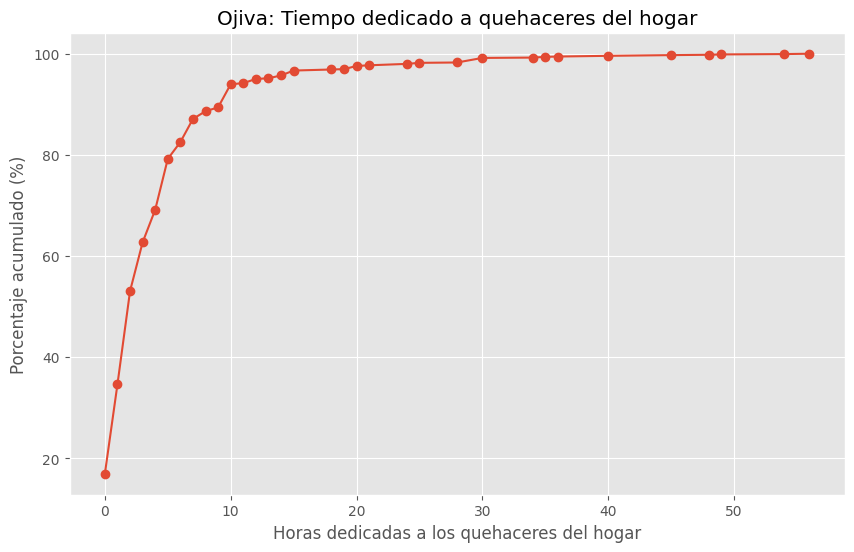

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(frecuencias_acumuladas.index, porcentajes_acumulados, marker='o', linestyle='-')
plt.title('Ojiva: Tiempo dedicado a quehaceres del hogar')
plt.xlabel('Horas dedicadas a los quehaceres del hogar')
plt.ylabel('Porcentaje acumulado (%)')
plt.grid(True)
plt.show()


In [28]:
# Pregunta a
porcentaje_minimo_15_horas = 100 - porcentajes_acumulados[porcentajes_acumulados.index < 15].max()
print(f"El porcentaje de los estudiantes que dedican mínimo 15 horas a la semana es: {porcentaje_minimo_15_horas:.2f}%")

# Pregunta b
porcentaje_maximo_5_horas = porcentajes_acumulados[porcentajes_acumulados.index <= 5].max()
print(f"El porcentaje de los estudiantes que dedican máximo 5 horas a la semana es: {porcentaje_maximo_5_horas:.2f}%")

# Pregunta c
horas_maximas_15_por_ciento = frecuencias_acumuladas[frecuencias_acumuladas >= total_estudiantes * 0.15].idxmin()
print(f"El máximo número de horas que el 15% de los estudiantes ayudan en sus casas es: {horas_maximas_15_por_ciento} horas")

# Pregunta d
porcentaje_al_menos_5_horas = 100 - porcentajes_acumulados[porcentajes_acumulados.index < 5].max()
print(f"El porcentaje de los estudiantes que ayudan en sus casas al menos 5 horas a la semana es: {porcentaje_al_menos_5_horas:.2f}%")

# Pregunta e
horas_minimas_35_por_ciento = frecuencias_acumuladas[frecuencias_acumuladas >= total_estudiantes * 0.35].idxmin()
print(f"El mínimo número de horas que el 35% de los estudiantes ayudan en sus casas es: {horas_minimas_35_por_ciento} horas")

# Pregunta f
moda_intervalo = tiempo_hogar.mode()[0]
print(f"El intervalo de moda se encuentra en las horas: {moda_intervalo}")

# Pregunta g
media_horas = tiempo_hogar.mean()
desviacion_estandar_horas = tiempo_hogar.std()
print(f"En promedio, los estudiantes ayudan en sus casas {media_horas:.2f} horas a la semana con una desviación estándar de {desviacion_estandar_horas:.2f} horas.")


El porcentaje de los estudiantes que dedican mínimo 15 horas a la semana es: 4.30%
El porcentaje de los estudiantes que dedican máximo 5 horas a la semana es: 79.21%
El máximo número de horas que el 15% de los estudiantes ayudan en sus casas es: 0 horas
El porcentaje de los estudiantes que ayudan en sus casas al menos 5 horas a la semana es: 30.84%
El mínimo número de horas que el 35% de los estudiantes ayudan en sus casas es: 2 horas
El intervalo de moda se encuentra en las horas: 2
En promedio, los estudiantes ayudan en sus casas 4.10 horas a la semana con una desviación estándar de 5.88 horas.


### **8. Construya una gráfica de Diagrama de cajas para la comparar la opinión en los diferentes Estados de hombres y mujeres (Gender) con respecto a la importancia de reducir la contaminación (pollution) a partir de esta gráfica responda las siguientes preguntas:**

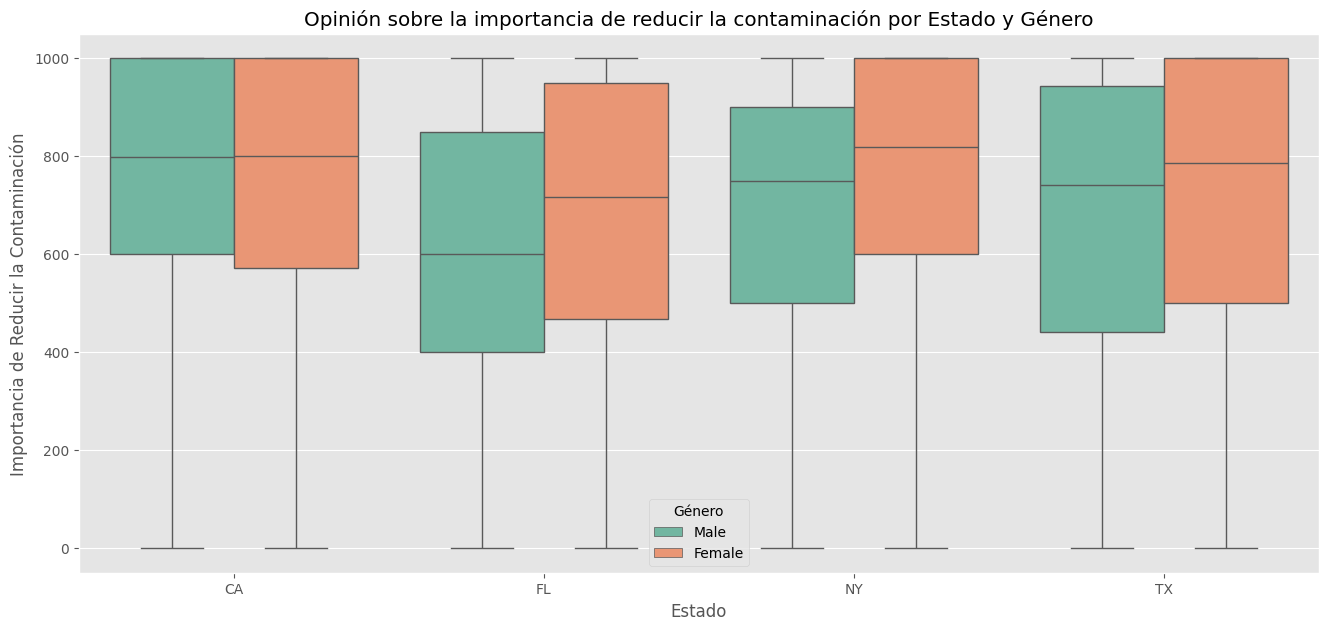

In [29]:
# Crear el diagrama de cajas
plt.figure(figsize=(16, 7))
sns.boxplot(x='Region', y='Importance_reducing_pollution', hue='Gender', data=df, palette='Set2')

# Títulos y etiquetas
plt.title('Opinión sobre la importancia de reducir la contaminación por Estado y Género')
plt.xlabel('Estado')
plt.ylabel('Importancia de Reducir la Contaminación')
plt.legend(title='Género')

plt.show()

#### *a. ¿En términos generales para quienes (hombres o mujeres) es más importante reducir la contaminación?*


Podemos observar que, de manera general, la mediana de las mujeres se acerca más a la importancia de reducir la contaminación que el de los hombres, y su IQR en la gran mayoría de los casos se encuentra entre la máxima importancia (lo que puede significar que el 50% de los datos esten ahí a lo menos, una mayoría de datos que en este caso representa una mayoría de personas que opinan sobre el tema), cosa que en el caso de los hombres pasa solo en uno en los cuatro estados. Por lo tanto, para las mujeres, en términos generales, es más importante reducir la contaminación

#### *b. ¿En términos generales en cuál Estado es más importante reducir la contaminación?*

En términos generales se puede observar que en el Estado de California, tanto en hombres como mujeres, su IQR (lo que puede significar que el 50% de los datos esten ahí a lo menos, una mayoría de datos que en este caso representa una mayoría de personas que opinan sobre el tema) se mantiene entre el máximo de importancia para reducir la contaminación, que al compararlos con los IQR con otros estados, vemos que a lo menos uno los dos sexos presentan opiniones diversas sobre la importancia máximo de reducir la contaminación. Lo que significa que en términos generales en el Estado de California es más importante reducir la contaminación.

#### *c. ¿En términos generales en cuál Estado es más importante para las mujeres reducir la contaminación?*

En términos generales para los mujeres del Estado de New York es más importante reducir la contaminación. A pesar de que el IQR del Estado de Texas y California se encuentren en el valor de máxima importancia de reducir la contaminación, la mediana de los datos en New York es la que más se acerca a este valor máximo, lo que nos puede indicar que con respecto a los estados anteriormente mencionados, el 50% de los mujeres a lo más, están aún más convencidos de la importancia de reducir la contaminación que el 50% de los mujeres a lo más de los diferentes estados.

#### *d. ¿En términos generales en cuál Estado es más importante para los hombres reducir la contaminación?*

En términos generales para las hombres del Estado de California es más importante reducir la contaminación, ya que su IQR (donde se encuentra a lo menos el 50% de las opiniones, en este caso de las hombres sobre contaminación) se mantiene en la máxima importancia de reducir la contaminación (1000), cosa que no sucede en los otros estados. Además, su mediana frente a los demás estados es la que más le apunta a la máxima importancia de reducir la contaminación

#### *e. ¿En términos generales en qué género la importancia de reducir la contaminación es más homogénea?*

En términos generales las mujeres tienen opiniones más homogéneas que los hombres. Podemos observar que las mujeres tienen un IQR casi similar al de los hombres. Sin embargo, al ver los bigotes inferiores y superiores de las mujeres y hombres, podemos observar que solo en el caso de las mujeres, hay un estado que presenta bigote superior e inferior, no como en el caso de los hombres, que en tres estados presentan bigotes superiores e inferiores, lo que podría ser un indicativo de que en los hombres existe más dispersión en las opiniones sobre la importancia de reducir la contaminación, lo que conlleva a una variabilidad mayor en estas opiniones siendo menos homogenea en comparación de las mujeres, lo que sugiere que en las mujeres la opinion es menos dispera y no haya una variabilidad tan alta como la de los hombres.

#### *f. ¿En términos generales en cuál Estado la importancia de reducir la contaminación es más heterogénea?*

En términos generales el Estado de Florida es más heterogéneo en la importancia de reducir la contaminación. Podemos observar que Florida es el único Estado en el que se presentan bigotes superiores e inferiores en los dos géneros. También tienen un IQR grande en comparación con algunos estados. Tomando en cuenta estas dos variables (bigotes e IQR), podríamos decir que en Florida la dispersión de opiniones sobre la importancia de reducir la contaminación es más alta, lo que puede indicar una mayor variabilidad en estas opiniones y por ende, ser el Estado en el que se presenta mayor heterogeneidad en las opiniones presentadas respecto a otros estados. 

#### *g. ¿En cuál género se presenta mayor asimetría en las calificaciones de la importancia de reducir la contaminación?*

En términos generales las mujeres son las que presentan mayor asimetría en la calificación de la importancia de reducir la contaminación. En la gráfica podemos observar que, de los 4 estados, en 3 las mujeres presentan un bigote inferior mucho más largo y un bigote superior casi indetectable, lo que sugiere que podría tratarse de una asimetría negativa en las opiniones de las mujeres. En comparación con las mujeres, los hombres presentan bigotes inferiores y superiores notables en 3 de los 4 estados, lo que sugiere que se acercan un poco más a la simetría con respecto a las mujeres.

#### *h. ¿En cuál Estado se presenta mayor asimetría en las calificaciones de la importancia de reducir la contaminación?*

En términos generales el Estado de California es donde se presenta una mayor asimetría en las calificaciones de la importancia de reducir la contaminación. Se puede observar en el gráfico que es el único Estado en el que es casi indectable el bigote superior (no se puede ver a simple vista, pero siempre está) y su bigote inferior es muy largo. Con lo anterior podemos concluir que tiene una asimetría negativa más evidente en comparación con los demás estados, haciendo a California la que tiene mayor asimetría en las calificaciones.

#### *i. ¿En cuál Estado las mujeres presentan mayor simetría en las calificaciones de la importancia de reducir la contaminación?*

En el Estado de Florida las mujeres presentan mayor simetría en las calificaciones de la importancia de reducir la contaminación. Podemos observar que, de los 4 estados, en Florida las mujeres presentan un bigote inferior largo y un bigote superior más largo y un IQR más centrado respecto a los demás estados, lo que puede indicar un equilibrio mayor respecto a los demás estados. Si bien la simetría no es perfecta, si es la mayor simetría que se puede encontrar en las opiniones de las mujeres en los 4 estados.

### *9. Construya una tabla cruzada de indicadores entre la variable “¿Cuantas horas de sueño por noche suele dormir cuando no tiene clases al día siguiente?” versus “Género”. A partir de esta tabla responda las siguientes preguntas:*

In [30]:
# Crear una tabla cruzada entre "Sleep_Hours_Non_Schoolnight" y "Gender"
# Aquí se está tomando la columna 'Sleep_Hours_Non_Schoolnight' para las filas y 'Gender' para las columnas.
cross_tab = pd.crosstab(df['Sleep_Hours_Non_Schoolnight'], df['Gender'], normalize='columns')

# Aplicar un estilo básico a la tabla usando pandas
cross_tab_styled = cross_tab.style.set_properties(**{
    'background-color': 'olive', 
    'color': 'white', 
    'border-color': 'black', 
    'border-width': '1px', 
    'border-style': 'solid'
}).set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#8fbc8f'), ('color', 'black')]}
])

# Mostrar la tabla estilizada
cross_tab_styled


Gender,Female,Male
Sleep_Hours_Non_Schoolnight,,
1,0.000000,0.005510
2,0.001395,0.005510
3,0.013947,0.012397
4,0.016736,0.030303
5,0.036262,0.037190
6,0.050209,0.055096
7,0.073919,0.074380
8,0.186890,0.203857
9,0.230126,0.210744


In [31]:
# a) ¿Qué porcentaje de estudiantes de la muestra son mujeres?
total_mujeres = df[df['Gender'] == 'Female'].shape[0]
total_estudiantes = df.shape[0]
porcentaje_mujeres = (total_mujeres / total_estudiantes) * 100
print(f"El porcentaje de estudiantes de la muestra que son mujeres es: {porcentaje_mujeres:.2f}%")


El porcentaje de estudiantes de la muestra que son mujeres es: 49.69%


In [32]:
# b) ¿Cuántas horas de sueño en promedio suelen dormir cuando no tiene clases al día siguiente los estudiantes de la muestra?
promedio_sueno = df['Sleep_Hours_Non_Schoolnight'].mean()
print(f"En promedio, los estudiantes duermen {promedio_sueno:.2f} horas cuando no tienen clases al día siguiente.")


En promedio, los estudiantes duermen 8.73 horas cuando no tienen clases al día siguiente.


In [33]:
# c) ¿En términos generales qué género duerme más tiempo?
promedio_sueno_por_genero = df.groupby('Gender')['Sleep_Hours_Non_Schoolnight'].mean()
genero_que_duerme_mas = promedio_sueno_por_genero.idxmax()
print(f"En términos generales, el género que duerme más tiempo es: {genero_que_duerme_mas}")


En términos generales, el género que duerme más tiempo es: Female


In [34]:
# d) ¿En términos generales qué género los tiempos son más homogéneos?
desviacion_por_genero = df.groupby('Gender')['Sleep_Hours_Non_Schoolnight'].std()
genero_mas_homogeneo = desviacion_por_genero.idxmin()
print(f"En términos generales, el género con los tiempos de sueño más homogéneos es: {genero_mas_homogeneo}")


En términos generales, el género con los tiempos de sueño más homogéneos es: Female


In [35]:
# e) ¿En términos generales qué género los tiempos son más simétricos?
asimetria_por_genero = df.groupby('Gender')['Sleep_Hours_Non_Schoolnight'].apply(lambda x: stats.skew(x.dropna()))
genero_mas_simetricos = asimetria_por_genero.abs().idxmin()
print(f"En términos generales, el género con los tiempos de sueño más simétricos es: {genero_mas_simetricos}")


En términos generales, el género con los tiempos de sueño más simétricos es: Female


In [36]:
# f) ¿Cuál género tiene un histograma más puntiagudo? ¿Cuál género tiene un histograma más aplanado o chato?
kurtosis_por_genero = df.groupby('Gender')['Sleep_Hours_Non_Schoolnight'].apply(lambda x: stats.kurtosis(x.dropna()))
genero_hist_puntiagudo = kurtosis_por_genero.idxmax()
genero_hist_aplanado = kurtosis_por_genero.idxmin()
print(f"El género con un histograma más puntiagudo es: {genero_hist_puntiagudo}")
print(f"El género con un histograma más aplanado es: {genero_hist_aplanado}")


El género con un histograma más puntiagudo es: Male
El género con un histograma más aplanado es: Female


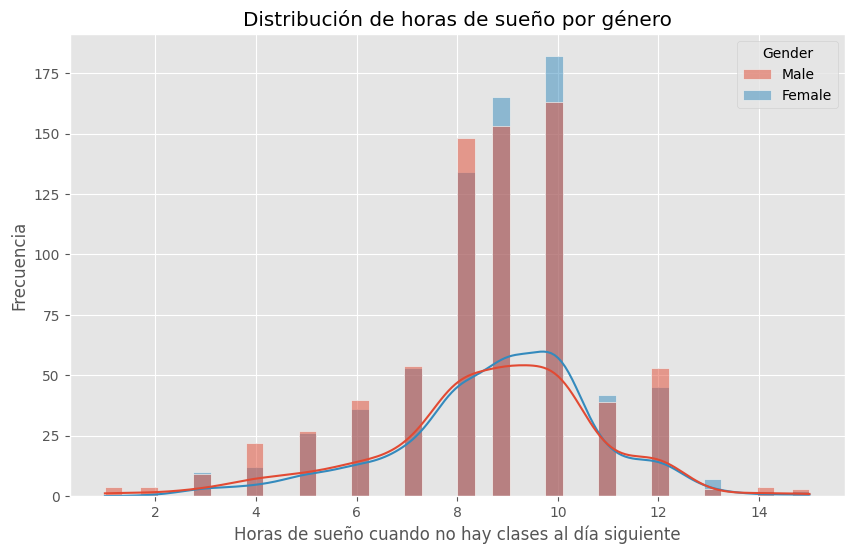

In [37]:
# Mostrar gráficos de distribución de horas de sueño por género
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Sleep_Hours_Non_Schoolnight', hue='Gender', kde=True)
plt.title('Distribución de horas de sueño por género')
plt.xlabel('Horas de sueño cuando no hay clases al día siguiente')
plt.ylabel('Frecuencia')
plt.show()


### **10. Construya una tabla cruzada entre la variable “Materia preferida en el Colegio” versus la variable “Género”. A partir de esta tabla responda las siguientes preguntas:**

In [38]:
pd.crosstab(df['Favorite_School_Subject'], df['Gender'])

Gender,Female,Male
Favorite_School_Subject,,
Art,116,29
Computers and technology,21,63
English,100,40
Geography,1,6
History,75,109
Languages,27,10
Mathematics and statistics,101,153
Music,33,33
Other,43,55


In [39]:
import pandas as pd

# Supongamos que tu DataFrame original es df
df = pd.DataFrame({
    'Favorite_School_Subject': ['Art', 'Computers and technology', 'English', 'Geography', 'History', 'Languages', 'Mathematics and statistics', 'Music', 'Other', 'Physical education', 'Science', 'Social studies'],
    'Female': [116, 21, 100, 1, 75, 27, 101, 33, 43, 40, 124, 36],
    'Male': [29, 63, 40, 6, 109, 10, 153, 33, 55, 86, 111, 31]
})

# Calcula la tabla de frecuencias relativas
df['Total'] = df['Female'] + df['Male']
df['Porcentual_frequency_Male'] = (df['Male'] / df['Total'].sum())*100
df['Porcentual_frequency_Female'] = (df['Female'] / df['Total'].sum())*100
df['Porcentual_frequency'] = (df['Total'] / df['Total'].sum())*100

# Mostrar el DataFrame con la nueva columna
print(df)

       Favorite_School_Subject  Female  Male  Total  \
0                          Art     116    29    145   
1     Computers and technology      21    63     84   
2                      English     100    40    140   
3                    Geography       1     6      7   
4                      History      75   109    184   
5                    Languages      27    10     37   
6   Mathematics and statistics     101   153    254   
7                        Music      33    33     66   
8                        Other      43    55     98   
9           Physical education      40    86    126   
10                     Science     124   111    235   
11              Social studies      36    31     67   

    Porcentual_frequency_Male  Porcentual_frequency_Female  \
0                    2.009702                     8.038808   
1                    4.365904                     1.455301   
2                    2.772003                     6.930007   
3                    0.415800       

#### *a. ¿A cuántos estudiantes hombres les gusta la historia?*

A 109 estudiantes hombres les gusta la historia.

#### *b. ¿Qué porcentaje de estudiantes son hombres?*

In [40]:
print(df['Porcentual_frequency_Male'].sum())

50.31185031185032


El porcentaje apróximado de estudiantes hombres es del 50.31%

#### *c. ¿Qué porcentaje de estudiantes prefieren música?*

El porcentaje apróximado de estudiantes que prefieren música es de 4.57%

#### *d. ¿De las mujeres, qué porcentaje de estudiantes prefieren otras actividades?*

De las mujeres el porcentaje de estudiantes qué prefieren otras actividades es apróximadamente del 2.98%

#### *e. ¿De los estudiantes que prefieren Ciencias, qué porcentaje son hombres?*

De los estudiantes que prefieren Ciencias, el porcentaje de hombres es apróximadamente del 7.69%

#### *f. ¿Qué porcentaje son mujeres y prefieren otras actividades?*

De las mujeres el porcentaje de estudiantes qué prefieren otras actividades es apróximadamente del 2.98%

#### *g. ¿Qué porcentaje son mujeres o prefieren música?*

In [41]:
womens_or_music = df['Porcentual_frequency_Female'].sum() + 4.573805
print(womens_or_music)

54.26195468814969


El porcentaje de estudiantes que son mujeres o prefieren música es apróximadamente del 54.26%

#### *h. ¿De las mujeres, qué porcentaje le gusta la música o las Ciencias?*


In [42]:
womens_like_music_or_science = 2.286902 + 8.593209
print(womens_like_music_or_science)

10.880111


El porcentaje de estudiantes mujeres que prefieren la música o las ciencias es apróximadamente del 10.88%